In [3]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
# create K Nearest Neighbors Classification model without sklearn

# function to calculate euclidean distance
def euclidean(x, x_train):
	return np.sqrt(np.sum(np.square(x - x_train)))
	
# KNN algorithm
def KNN(X_test, X_train, Y_train, K):
	
	# no_of_test_examples, no_of_features
	m_test, n = X_test.shape
	m, n = X_train.shape

	# initialize Y_predict
	Y_predict = np.zeros(m_test)
	
	for i in range(m_test) :
		x = X_test[i]
		
		# find the K nearest neighbors from current test example
		neighbors = np.zeros(K)
		euclidean_distances = np.zeros(m)
		
		for j in range(m):
			d = euclidean(x, X_train[j])
			euclidean_distances[j] = d
		
		# sort Y_train according to euclidean_distance_array and
		# store into Y_train_sorted
		inds = euclidean_distances.argsort()
		Y_train_sorted = Y_train[inds]
		neighbors = Y_train_sorted[:K]
		
		# most frequent class in K neighbors
		Y_predict[i] = mode(neighbors)[0][0]	
	
	return Y_predict

In [5]:
# Importing dataset
df = pd.read_csv("apples_and_oranges.csv")
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

# Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [6]:
# create model with Sklearn 
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train,y_train)

# Prediction on test set
y_pred = KNN(X_test, X_train, y_train, 3)   # our customized function
y_pred1 = model1.predict(X_test)            # from sklearn

In [7]:
# measure performance
correctly_classified = 0
correctly_classified1 = 0

# measuring accuracy by counting correctly classified test data
# counter
count = 0
for count in range(np.size(y_pred)):
    if y_test[count] == y_pred[count]:
        correctly_classified = correctly_classified + 1		
    if y_test[count] == y_pred1[count]:
        correctly_classified1 = correctly_classified1 + 1
    count = count + 1
    
print( "Accuracy on test set by our model : ", (correctly_classified/count)*100)
print( "Accuracy on test set by sklearn model : ", (correctly_classified1/count)*100)

Accuracy on test set by our model :  100.0
Accuracy on test set by sklearn model :  100.0


In [8]:
# The accuracy achieved by our model and sklearn is equal 
# which indicates the correct implementation of our model.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Importing dataset
df = pd.read_csv("indians-diabetes-data.csv")
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

# Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

model2 = KNeighborsClassifier(n_neighbors=20, metric='chebyshev')
model2.fit(X_train,y_train)

# Prediction on test set
y_pred2 = model2.predict(X_test)
score = accuracy_score(y_pred2,y_test)
score

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.71875

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

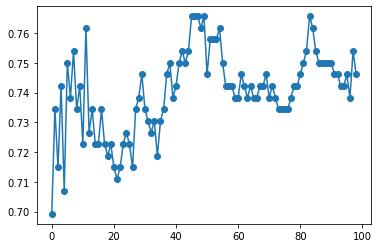

In [17]:
list_akurasi = []
import matplotlib.pyplot as plt

for k in range(1,100):
    knnu = KNeighborsClassifier(n_neighbors = k)
    knnu.fit(X_train, y_train)
    y_predu = knnu.predict(X_test)
    angka_akurasi = accuracy_score(y_test, y_predu)
    list_akurasi.append(angka_akurasi)
    
plt.plot(list_akurasi, marker = 'o')